<h1 style="color:blue; text-align:center;">SVM</h1>


<h2>Load the Preprocessed Dataset</h2>

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import label_binarize

In [38]:
df = pd.read_csv("../Dataset/after_preprocessing.csv")
df.shape

(73915, 23)

<h2>Split the Dataset into Features and Target</h2>

In [39]:
x = df.drop(columns = [ 'Attrition'])
y = df['Attrition']

<h2>Split the Dataset into Training and Testing Sets</h2>

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [41]:
x_train.shape, x_test.shape

((59132, 22), (14783, 22))

<h2>Train an SVM Classifier</h2>

In [42]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [43]:
y_pred = svm_classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(14783,))

<h2>Evaluate the SVM Classifier</h2>

In [44]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:',conf_matrix)
print('Classification Report:', class_report)

Accuracy: 73.83%
Confusion Matrix: [[5027 1944]
 [1924 5888]]
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.72      0.72      6971
           1       0.75      0.75      0.75      7812

    accuracy                           0.74     14783
   macro avg       0.74      0.74      0.74     14783
weighted avg       0.74      0.74      0.74     14783



<h2>ROC-AUC Curve for SVM</h2>

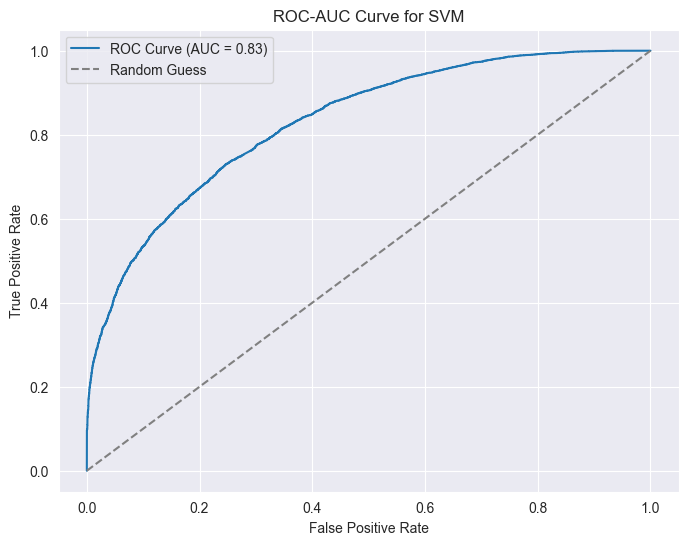

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_classifier = SVC(probability=True)
svm_classifier.fit(x_train, y_train)

y_pred_proba = svm_classifier.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for SVM')
plt.legend()
plt.show()

<h2>Train an SVM Classifier with Custom Gamma
python</h2>


In [9]:
model_g = SVC(gamma=5)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.53054183859839

In [10]:
y_pred_g = model_g.predict(x_test)
y_pred_g

array([1, 1, 1, ..., 1, 1, 1], shape=(14783,))

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_g))

              precision    recall  f1-score   support

           0       0.58      0.02      0.03      6971
           1       0.53      0.99      0.69      7812

    accuracy                           0.53     14783
   macro avg       0.56      0.50      0.36     14783
weighted avg       0.56      0.53      0.38     14783



<h2>Train an SVM Classifier with Custom Tolerance</h2>

In [12]:
model_t = SVC(tol=5)
model_t.fit(x_train, y_train)

SVC(tol=5)

In [13]:
y_pred_t = model_t.predict(x_test)
y_pred_t

array([1, 1, 1, ..., 1, 1, 1], shape=(14783,))

In [14]:
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6971
           1       0.53      1.00      0.69      7812

    accuracy                           0.53     14783
   macro avg       0.26      0.50      0.35     14783
weighted avg       0.28      0.53      0.37     14783



D:\employee-attrition-prediction-ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\employee-attrition-prediction-ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\employee-attrition-prediction-ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

<h2>Feature Selection with Chi-Square and Mutual Information</h2>

In [15]:
best_k_chi2 = 10
best_k_mi = 10

selector_chi2 = SelectKBest(score_func=chi2, k=best_k_chi2)
x_train_selected_chi2 = selector_chi2.fit_transform(x_train, y_train)
x_test_selected_chi2 = selector_chi2.transform(x_test)

selected_features_chi2 = selector_chi2.get_support(indices=True)
selected_feature_names_chi2 = x_train.columns[selected_features_chi2]
print("Selected Features (Chi-Square):", list(selected_feature_names_chi2))

Selected Features (Chi-Square): ['Gender', 'Work-Life Balance', 'Job Satisfaction', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Job Level', 'Remote Work']


In [16]:
svm_classifier_chi2 = SVC()
svm_classifier_chi2.fit(x_train_selected_chi2, y_train)

y_pred_chi2 = svm_classifier_chi2.predict(x_test_selected_chi2)
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)
conf_matrix_chi2 = confusion_matrix(y_test, y_pred_chi2)
class_report_chi2 = classification_report(y_test, y_pred_chi2)

print(f'\n🔹 SVM Accuracy after Chi-Square Feature Selection: {accuracy_chi2 * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix_chi2)
print('Classification Report:\n', class_report_chi2)


🔹 SVM Accuracy after Chi-Square Feature Selection: 73.59%
Confusion Matrix:
 [[5027 1944]
 [1960 5852]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      6971
           1       0.75      0.75      0.75      7812

    accuracy                           0.74     14783
   macro avg       0.74      0.74      0.74     14783
weighted avg       0.74      0.74      0.74     14783



In [17]:
selector_mi = SelectKBest(score_func=mutual_info_classif, k=best_k_mi)
x_train_selected_mi = selector_mi.fit_transform(x_train, y_train)
x_test_selected_mi = selector_mi.transform(x_test)

selected_features_mi = selector_mi.get_support(indices=True)
selected_feature_names_mi = x_train.columns[selected_features_mi]
print("\nSelected Features (Mutual Information):", list(selected_feature_names_mi))


Selected Features (Mutual Information): ['Gender', 'Work-Life Balance', 'Number of Promotions', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Remote Work', 'Innovation Opportunities', 'Company Reputation']


In [18]:
svm_classifier_mi = SVC()
svm_classifier_mi.fit(x_train_selected_mi, y_train)

y_pred_mi = svm_classifier_mi.predict(x_test_selected_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)
class_report_mi = classification_report(y_test, y_pred_mi)

print(f'\n🔹 SVM Accuracy after Mutual Information Feature Selection: {accuracy_mi * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix_mi)
print('Classification Report:\n', class_report_mi)


🔹 SVM Accuracy after Mutual Information Feature Selection: 73.91%
Confusion Matrix:
 [[5071 1900]
 [1957 5855]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      6971
           1       0.75      0.75      0.75      7812

    accuracy                           0.74     14783
   macro avg       0.74      0.74      0.74     14783
weighted avg       0.74      0.74      0.74     14783



<h2>Visualize the SVM Decision Boundary</h2>

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

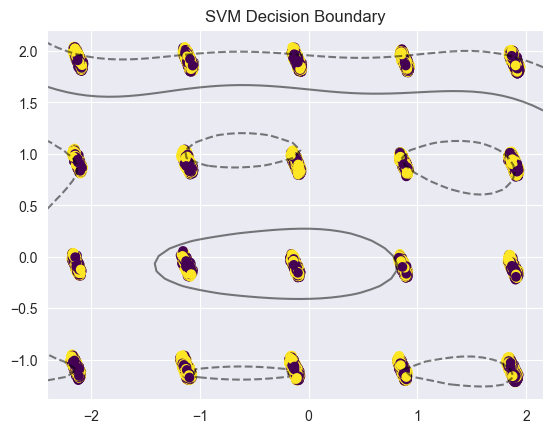

In [18]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

svm_classifier.fit(x_pca, y_train)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.show()

<h2>Visualize the Support Vectors</h2>

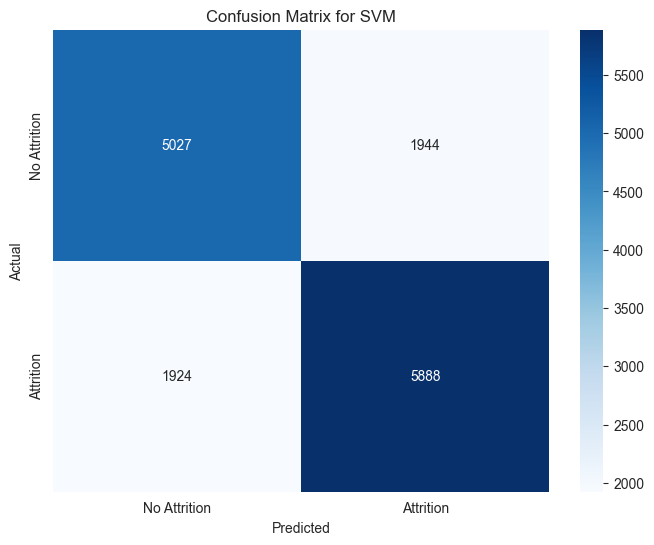

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()